In [87]:
import pandas as pd
from matplotlib import pyplot as plt

# Read the data from the CSV file

trials = ["qed_FM","qed_TB","qed_SubTB","seh_TB","seh_SubTB"] #seh_FM

dataframes = [pd.read_csv(f'./logs/training_objectives/{trial}/dataframe.csv') for trial in trials]


In [67]:
df = pd.concat(dataframes, ignore_index=True)

In [68]:
#if df_qed["config/algo/method"]=="TB" and df_qed["config/algo/tb/do_subtb"]==True change the value in method column to SubTB

#find the rows where the method is TB and the subtb is true
df.loc[(df["config/algo/method"]=="TB") & (df["config/algo/tb/do_subtb"]==True), "config/algo/method"] = "SubTB"


#df["config/algo/method"]

In [69]:
df["config/algo/method"].value_counts()

config/algo/method
TB       32
SubTB    32
FM        3
Name: count, dtype: int64

In [70]:
# pick only the qed tasks "confg/task/name" should be qed
df_qed = df[df["config/task/name"] == "qed"]
df_seh = df[df["config/task/name"] == "seh"]

In [71]:
df.shape, df_qed.shape, df_seh.shape 

((67, 63), (35, 63), (32, 63))

In [72]:
df["config/task/name"].value_counts()

config/task/name
qed    35
seh    32
Name: count, dtype: int64

In [77]:
df = df_qed #dataframe to analyse

In [90]:
df["config/algo/method"].value_counts()

config/algo/method
SubTB    16
TB       16
FM        3
Name: count, dtype: int64

<Axes: xlabel='config/algo/method'>

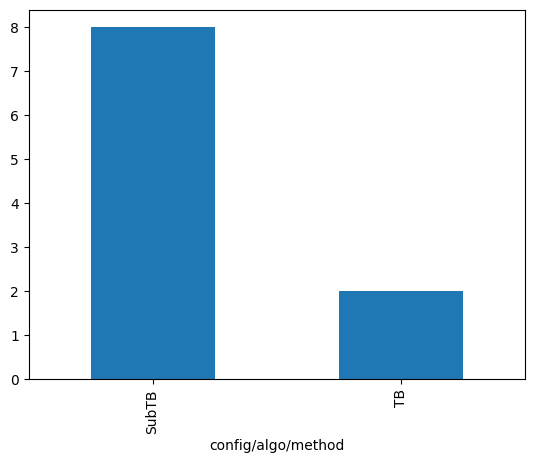

In [78]:
# sort dataframe by val_loss
df = df.sort_values(by="val_loss", ascending=True)
df["val_loss"]

#take first 5 rows and plot the distribution of the column "config/method"
df.head(10)["config/algo/method"].value_counts().plot(kind="bar")

<BarContainer object of 3 artists>

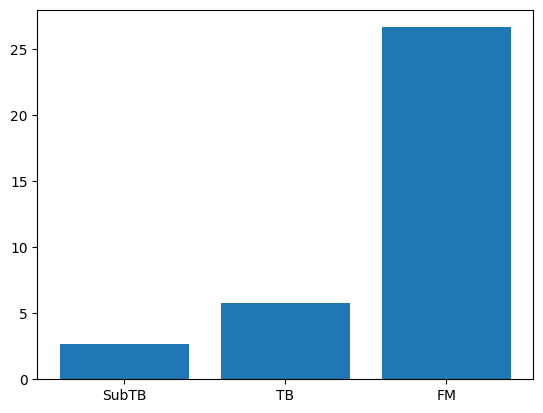

In [88]:
# get all instances of method == "TB"
df[df['config/algo/method'] == "TB"]["val_loss"]
#get the 95% percentile of the val_loss
df[df['config/algo/method'] == "TB"]["val_loss"].quantile(0.05)

# repeat that for the other methods (TB, SubTB and FM) and plot the results
quantiles = []
for method in ["SubTB", "TB", "FM"]:
    quantiles.append(df[df['config/algo/method'] == method]["val_loss"].quantile(0.05))

plt.bar(["SubTB", "TB", "FM"], quantiles)